# Imports and installations

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [180]:
# Install dependencies requied for this project
!pip install -q pandas deep_translator retry seaborn

# DataFrame loading and preprocessing

In [188]:
# Load the excel file as a dataframe using the build-in function
df=pd.read_excel('~/new_project/number-of-contracts-concluded-by-commercial-vehicle-company-vehicle-model-and-year-of-manufactu.xlsx')
df

,Unnamed: 0,Unnamed: 1,عدد العقود المبرمة حسب الشركة الصانعة للمركبة المؤجرة وطراز المركبة وسنة الصنع,Unnamed: 3
0,الشركة,طراز المركبة,سنة الموديل,عدد العقود
1,تويوتا,يارس,2023,41376
2,نيسان,صني,2022,33576
3,هونداي,اكسنت,2023,31152
4,هونداي,اكسنت,2020,30674
...,...,...,...,...
1258,لكزس,أي أس 053,2018,2
1259,لكزس,ال اس 005,2020,2
1260,لكزس,ايه اس 053,2020,2
1261,لكزس,جي اس 053,2019,2


In [189]:
# Set the first row of the DataFrame as the column headers
df.columns = df.iloc[0]  # Assign the values in the first row as column headers

# Exclude the first row (as it contains the headers)
# Reset the index to start from 0, dropping the old index
df = df[1:].reset_index(drop=True)
df

,الشركة,طراز المركبة,سنة الموديل,عدد العقود
0,تويوتا,يارس,2023,41376
1,نيسان,صني,2022,33576
2,هونداي,اكسنت,2023,31152
3,هونداي,اكسنت,2020,30674
4,هونداي,اكسنت,2022,25168
...,...,...,...,...
1257,لكزس,أي أس 053,2018,2
1258,لكزس,ال اس 005,2020,2
1259,لكزس,ايه اس 053,2020,2
1260,لكزس,جي اس 053,2019,2


In [190]:
# Retrieve unique column names from the DataFrame's columns attribute
unique_columns = df.columns.unique()
unique_columns

Index(['الشركة ', 'طراز المركبة ', 'سنة الموديل ', 'عدد العقود'], dtype='object', name=0)

In [196]:
from deep_translator import GoogleTranslator

# Function to translate text from Arabic to English using GoogleTranslator for more workability
def translate_text(text):
    try:
        # Attempting translation from Arabic to English
        translation = GoogleTranslator(source='ar', target='en').translate(text)
        return translation  # Return the translated text
    except Exception as e:
        print(f"Translation Error: {e}")  # Display any translation error
        return "Translation Error"  # Return an error message in case of translation failure


In [193]:
# Apply translation to each column
# Assuming 'الشركة' represents the 'Company' column in Arabic

# Using the translate_text function to translate the 'Company' column from Arabic to English
df['Company'] = df['الشركة '].apply(lambda x: translate_text(x))

In [194]:
# Translate the 'Model name' column from Arabic to English
# Assuming 'طراز المركبة' represents the 'Model name' column in Arabic

# Using the translate_text function to translate the 'Model name' column from Arabic to English
df['Model name'] = df['طراز المركبة '].apply(lambda x: translate_text(x))

Translation Error: 25 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 23 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 5 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 23 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 537 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 35 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 63 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 35 --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation Error: 30 --> text must be a valid text with maximum 5000 character,otherwis

In [195]:
# Dropping the columns 'الشركة' and 'طراز المركبة' from the DataFrame using the drop function

# Setting inplace=True to make the changes in the DataFrame itself
df.drop(columns=['الشركة ','طراز المركبة '], axis=1, inplace=True)

In [198]:
# Corrections dictionary to map incorrect company names to corrected names
corrections = {
    'April': 'Nissan',
    'GEC': 'GAC',
    'James': 'Jeep',
    'rover': 'Land Rover',
    'Guangzhou': 'Guangzhou Motors',
    'From me cooper': 'Mini',
    'Your door': 'Opel',
    'They hate it': 'Haima',
    'Pike': 'Daihatsu',
    'Pike Pike D': 'Daihatsu',
    'GM': 'General Motors',
    'Ford Torres': 'Ford',
    'Archer': 'Arcfox',
    'Dong Feng': 'Dongfeng'
}

# Replace incorrect company names in the 'Company' column with corrected names using the corrections dictionary
df['Company'].replace(corrections, inplace=True)
df

,سنة الموديل,Contract count,Company,Model name
0,2023,41376,Toyota,Yaris
1,2022,33576,Nissan,Sunny
2,2023,31152,Hyundai,Accent
3,2020,30674,Hyundai,Accent
4,2022,25168,Hyundai,Accent
...,...,...,...,...
1257,2018,2,Lexus,AS053
1258,2020,2,Lexus,LS005
1259,2020,2,Lexus,AS053
1260,2019,2,Lexus,GS053


In [199]:
# Renaming columns 'سنة الموديل' to 'Model year' and 'عدد العقود' to 'Contract count' 
df.rename(columns={'سنة الموديل ': 'Model year', 'عدد العقود': 'Contract count'}, inplace=True)
df

,Model year,Contract count,Company,Model name
0,2023,41376,Toyota,Yaris
1,2022,33576,Nissan,Sunny
2,2023,31152,Hyundai,Accent
3,2020,30674,Hyundai,Accent
4,2022,25168,Hyundai,Accent
...,...,...,...,...
1257,2018,2,Lexus,AS053
1258,2020,2,Lexus,LS005
1259,2020,2,Lexus,AS053
1260,2019,2,Lexus,GS053


In [203]:
# Save to CSV file so that we don't have to do all the above operations again
df.to_csv('new_file.csv', index=False) 

In [2]:
df1=pd.read_csv('~/new_project/new_file.csv')
df1

,Model year,Contract count,Company,Model name
0,2023,41376,Toyota,Yaris
1,2022,33576,Nissan,Sunny
2,2023,31152,Hyundai,Accent
3,2020,30674,Hyundai,Accent
4,2022,25168,Hyundai,Accent
...,...,...,...,...
1257,2018,2,Lexus,AS053
1258,2020,2,Lexus,LS005
1259,2020,2,Lexus,AS053
1260,2019,2,Lexus,GS053


In [3]:
df1['Company'].unique()

array(['Toyota', 'Nissan', 'Hyundai', 'Kia', 'jelly', 'Changan', 'Suzuki',
       'Chevrolet', 'Shery', 'SAIC Motor', 'Mitsubishi', 'Ford', 'GAC',
       'Mazda', 'BYD', 'Jeep', 'Mercedes', 'BMW', 'Renault', 'Lexus',
       'Great Wall', 'land Rover', 'Haval', 'Gator', 'Audi', 'Daihatsu',
       'Peugeot', 'Shangan', 'Dodge', 'Isuzu', 'Honda', 'GMC',
       'Volkswagen', 'Land Rover', 'Guangzhou Motors', 'Genesis', 'Faw',
       'Range Rover', 'JMC', 'Fiat', 'Zutti', 'Psych Maxus', 'Ssangyong',
       'Mini', 'Jack', 'General Motors', 'Cadillac', 'Chrysler', 'pocket',
       'Rolls-Royce', 'Opel', 'LinkCo', 'Haima', 'Porsche', 'Lamborghini',
       'MG', 'Bentley', 'Buick', 'Lucid', 'Arcfox', 'Maserati', 'ZXAuto',
       'Dongfeng', 'Tesla', 'Cherry', 'Maxus', 'Aston Martin'],
      dtype=object)

# Visualization

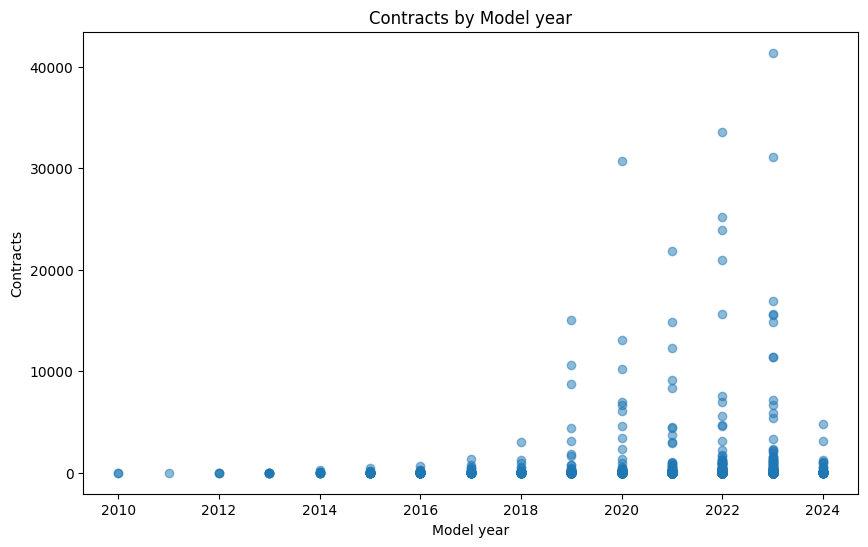

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Model year'], df1['Contract count'], alpha=0.5)
plt.xlabel('Model year')
plt.ylabel('Contracts')
plt.title('Contracts by Model year')

plt.show()

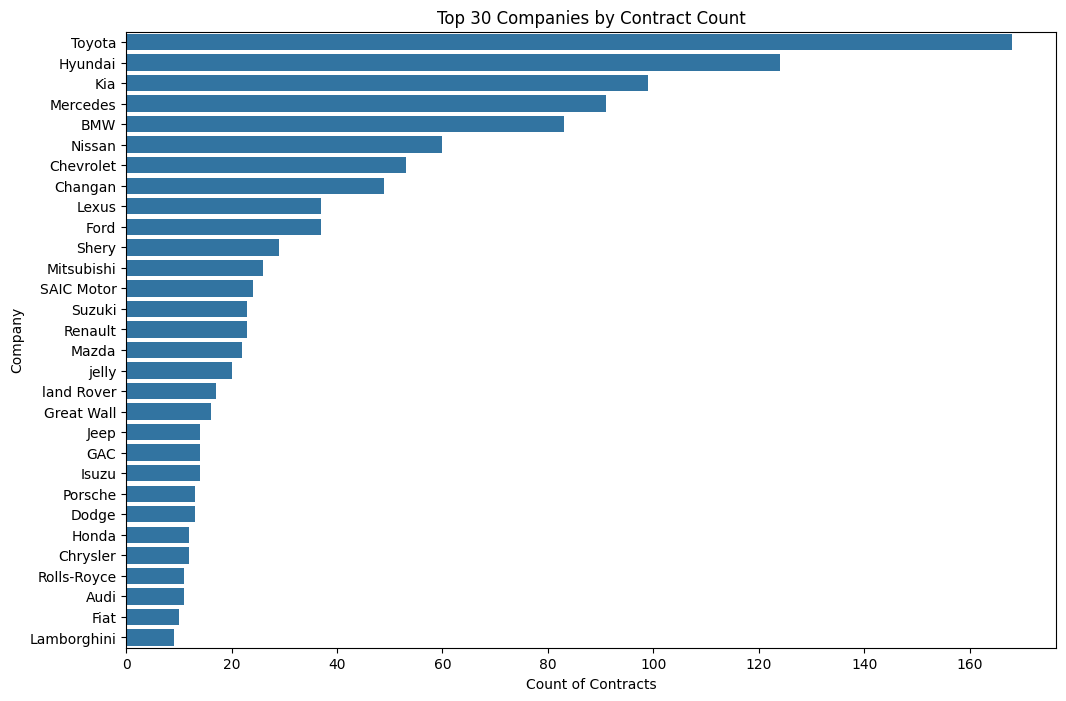

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Company', data=df1, order=df1['Company'].value_counts().iloc[:30].index)
plt.xlabel('Count of Contracts')
plt.ylabel('Company')
plt.title('Top 30 Companies by Contract Count')
plt.show()

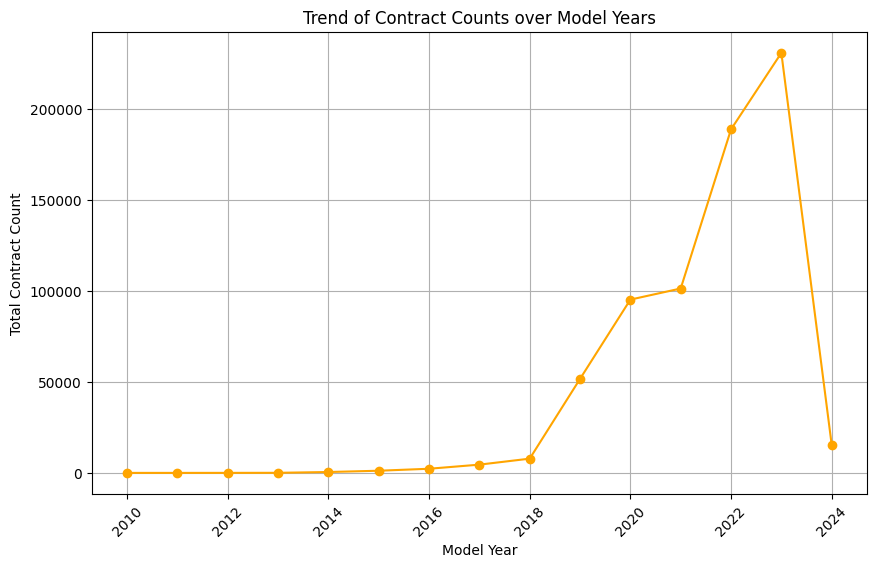

In [31]:
plt.figure(figsize=(10, 6))
df1.groupby('Model year')['Contract count'].sum().plot(marker='o', color='orange')
plt.title('Trend of Contract Counts over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Total Contract Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


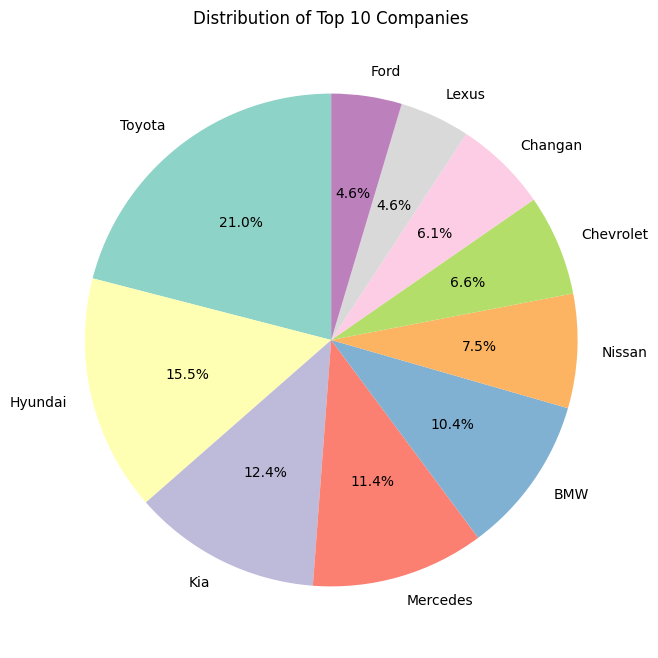

In [32]:
plt.figure(figsize=(8, 8))
df1['Company'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', 10))
plt.title('Distribution of Top 10 Companies')
plt.ylabel('')
plt.show()


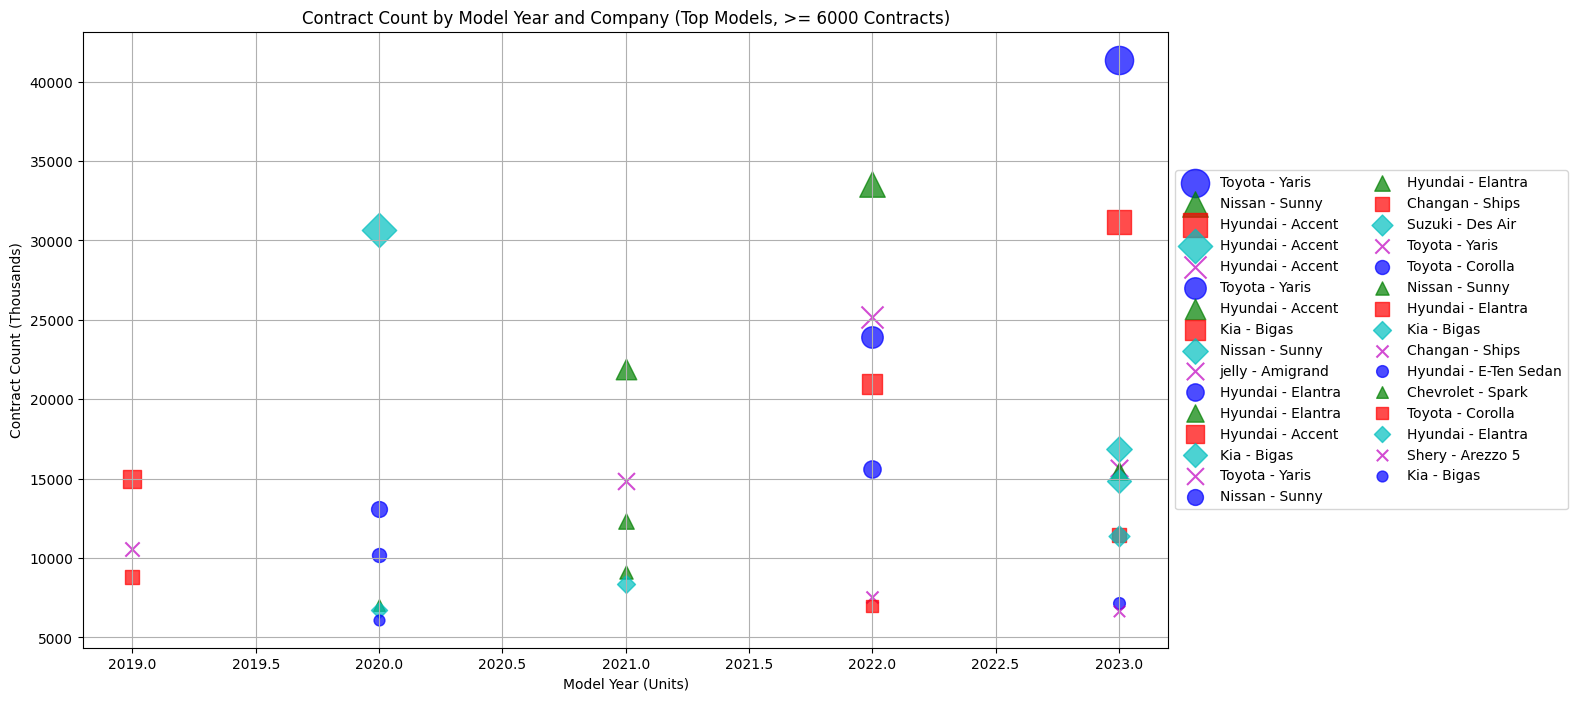

In [46]:
plt.figure(figsize=(14, 8))

# Filter data
filtered_df = df1[df1["Contract count"] >= 6000]

# Define colors and markers based on company or model name
colors = ["b", "g", "r", "c", "m"]
markers = ["o", "^", "s", "D", "x"]

# Iterate and plot with color and marker variation
for i, row in filtered_df.iterrows():
    company, model_name, count, year = row["Company"], row["Model name"], row["Contract count"], row["Model year"]
    plt.scatter(year, count, label=f"{company} - {model_name}", alpha=0.7, s=count/100, c=colors[i % len(colors)], marker=markers[i % len(markers)])

# Add annotations for specific points if needed

# Update axis labels and title with relevant information
plt.xlabel("Model Year (Units)")
plt.ylabel("Contract Count (Thousands)")
plt.title("Contract Count by Model Year and Company (Top Models, >= 6000 Contracts)")

# Use 'ncol' to automatically arrange legend in multiple columns
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)

# Show grid
plt.grid(True)

# Display the plot
plt.show()


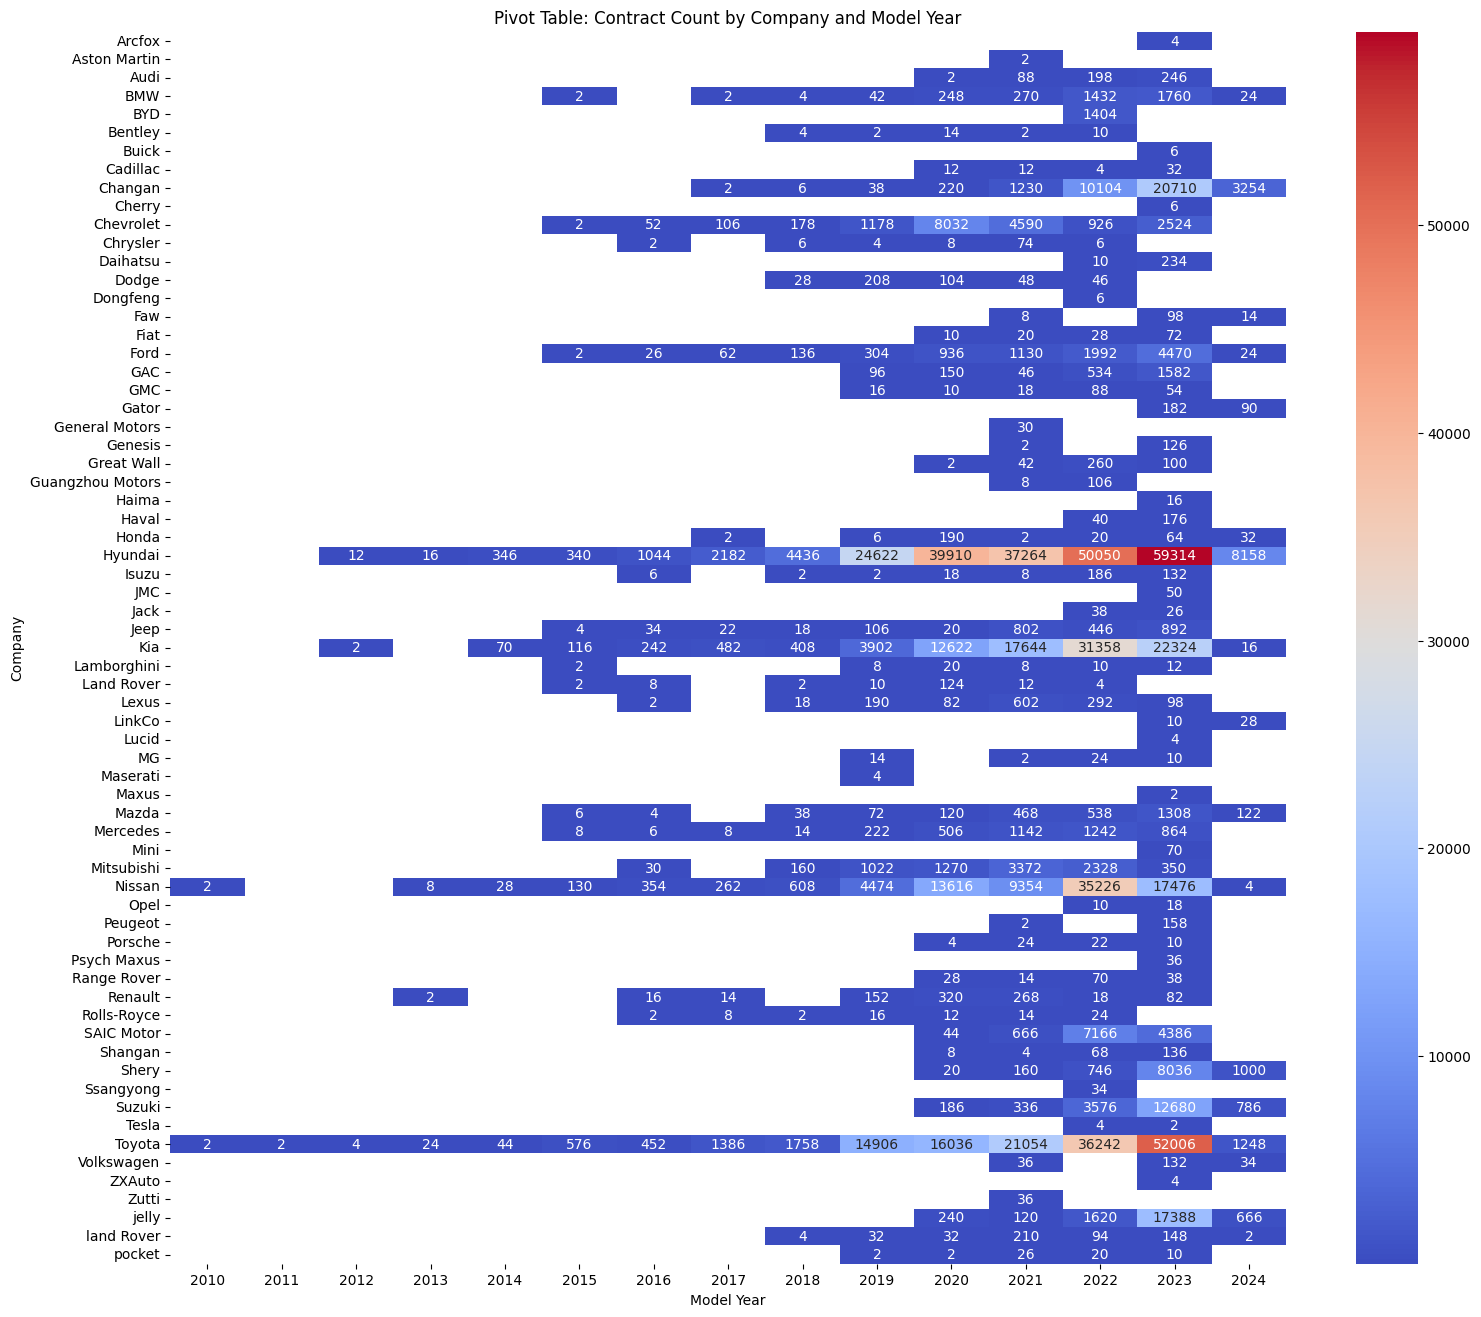

In [44]:

# Assuming 'df' is your DataFrame
# Creating a pivot table based on 'Model year', 'Contract count', 'Company', and 'Model name'
pivot_df = df1.pivot_table(values='Contract count', index='Company', columns='Model year', aggfunc='sum')

# Visualizing the pivot table using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt="g")
plt.title('Pivot Table: Contract Count by Company and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Company')
plt.show()


# Statistical measurements

In [115]:
from sklearn.linear_model import LinearRegression

# Assuming 'X' contains features and 'y' is the target variable 'Contract count'
X = df1[['Model year']]
y = df1['Contract count']

# Initialize and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Coefficients and intercept to understand the relationship
print("Coefficient:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Predicting 'Contract count' based on 'Model year'
predicted_counts = regressor.predict(X)

# Displaying the top models with the highest predicted contract counts
df1['Predicted Contract count'] = predicted_counts
top_models = df1.nlargest(10, 'Predicted Contract count')[['Model name', 'Contract count']]
print("Top 10 models with the highest predicted contract counts:")
print(top_models)


Coefficient: [93.05010044]
Intercept: -187469.64626489434
Top 10 models with the highest predicted contract counts:
      Model name  Contract count
34        Accent            4800
45         Ships            3092
70   E-Ten Sedan            1230
79       Elantra            1090
81       Corolla            1062
90      Arezzo 5             962
117     Amigrand             580
119      Des Air             554
126     Grand 01             508
191       Baleno             232


In [118]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors

# Assuming 'X' contains features and 'y' is the target variable 'Contract count'
X = df1[['Model year', 'Contract count']]

# Initialize the KNN model
k = 10  # Number of neighbors to find
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Define a function to find and display nearest neighbors for a given data point
def find_nearest_neighbors(model_year, contract_count, knn_model, k_neighbors=3):
    """
    Function to find and display nearest neighbors for a given data point.

    Args:
    - model_year: The year of the model.
    - contract_count: The count of the contracts.
    - knn_model: The trained KNN model.
    - k_neighbors: Number of nearest neighbors to find (default: 3).

    Returns:
    - nearest_neighbors: DataFrame containing the nearest neighbors' information.
    """
    data_point = [[model_year, contract_count]]
    distances, indices = knn_model.kneighbors(data_point)
    nearest_neighbors = df1.iloc[indices[0]]
    return nearest_neighbors.head(k_neighbors)

# Finding and displaying nearest neighbors for a specific data point
model_year_example = 2026
contract_count_example = 1000
nearest_neighbors = find_nearest_neighbors(model_year_example, contract_count_example, knn, k_neighbors=10)
print("Nearest neighbors:")
print(nearest_neighbors)


Nearest neighbors:
    Model year  Contract count     Company  Model name  \
85        2020             994  Mitsubishi       Atraj   
84        2022            1010         Kia          K5   
86        2018             992      Toyota     Corolla   
88        2022             982  SAIC Motor        MGGT   
87        2022             982  SAIC Motor       MG ZS   
89        2021             974     Hyundai  Kona Wagon   
90        2024             962       Shery    Arezzo 5   
83        2022            1042  Mitsubishi       Atraj   
91        2023             950     Hyundai    Grand 01   
92        2022             944  Mitsubishi  Space Star   

    Predicted Contract count  
85                491.556628  
84                677.656829  
86                305.456427  
88                677.656829  
87                677.656829  
89                584.606729  
90                863.757030  
83                677.656829  
91                770.706929  
92                677.656829  


/home/gulshair/anaconda3/envs/forecast/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [119]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame
encoded_df = df1.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
encoded_df['Company'] = label_encoder.fit_transform(encoded_df['Company'])
encoded_df['Model name'] = label_encoder.fit_transform(encoded_df['Model name'])

# Now you can perform correlation analysis
correlation_matrix = encoded_df.corr()
print(correlation_matrix)


                          Model year  Contract count   Company  Model name  \
Model year                  1.000000        0.078606 -0.106493   -0.038215   
Contract count              0.078606        1.000000  0.036706   -0.054520   
Company                    -0.106493        0.036706  1.000000    0.042801   
Model name                 -0.038215       -0.054520  0.042801    1.000000   
Predicted Contract count    1.000000        0.078606 -0.106493   -0.038215   

                          Predicted Contract count  
Model year                                1.000000  
Contract count                            0.078606  
Company                                  -0.106493  
Model name                               -0.038215  
Predicted Contract count                  1.000000  


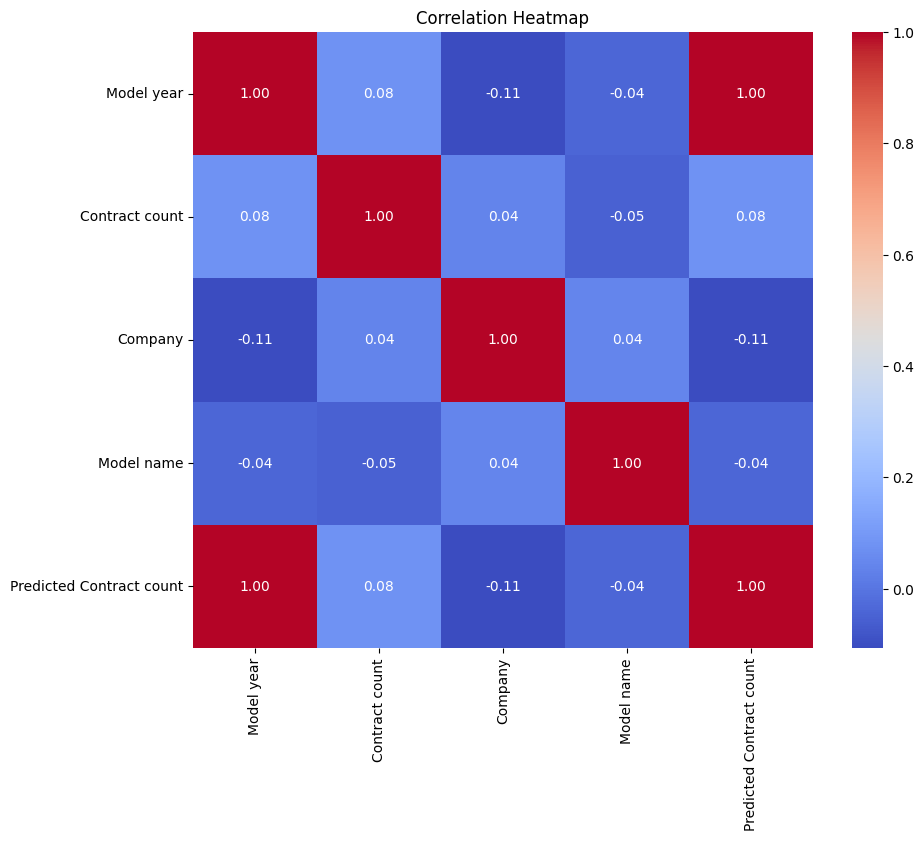

In [120]:
# Generate the correlation matrix (assuming 'encoded_df' contains the encoded DataFrame)
correlation_matrix = encoded_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
